In [2]:
# import numpy, pandas, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read CSV file

df = pd.read_csv('containerinfo1.csv')
df.head()

,Container,Delivery Number,Box Number,BoxDims
0,CO12345,3045812378,F79-45678,8 x 12
1,CO12345,3080996722,F79-90662,20 x 25
2,CO12345,3080996722,F79-00571,8 x 12
3,CO12345,3065881234,F79-3508,20 x 25


In [4]:
# count the number of boxes for each box dimension

counts = df['BoxDims'].value_counts()

In [5]:
# store the number of boxes with dimensions '8 x 12' and '20 x 25'

n_812 = counts.get('8 x 12', 0)
n_2025 = counts.get('20 x 25', 0)

print("Number of boxes with dimensions '8 x 12': ", n_812)
print("Number of boxes with dimensions '20 x 25': ", n_2025)

Number of boxes with dimensions '8 x 12':  2
Number of boxes with dimensions '20 x 25':  2


In [6]:
# import rectpack

from rectpack import newPacker
import rectpack.packer as packer

In [7]:
# plot the solution

def soln_plot(rects, box_812, box_2025):
    # Plot
    plt.figure(figsize=(3,3))
    plt.xlim(0, 500)
    plt.ylim(0, 500)
    
    # Loop over all rectangles
    for rect in rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x+w, x+w, x, x
        y1, y2, y3, y4, y5 = y, y, y+h, y+h,y

        # Pallet type
        plt.plot([x1,x2,x3,x4,x5],[y1,y2,y3,y4,y5])
    
    plt.show()

# b - Bin index
# x - Rectangle bottom-left corner x coordinate
# y - Rectangle bottom-left corner y coordinate
# w - Rectangle width
# h - Rectangle height
# rid - User assigned rectangle ID

In [8]:
# solve packing

def solver(n_812, n_2025, bins):
    # boxes to load
    rectangles = [box_812 for i in range(n_812)] + [box_2025 for i in range(n_2025)]
    
    # build the Packer
    # PackingMode.offline is an API call, packing won't start until pack() is called
    # PackingMode.Global is an API call, packs  the rectangle with the best fit until it is full, then continues with next bin
    pack = newPacker(mode = packer.PackingMode.Offline, bin_algo = packer.PackingBin.Global,
                     rotation=True)

    # add the rectangles to the packing queue
    for r in rectangles:
        pack.add_rect(*r)

    # add the bins where the rectangles will be placed
    for b in bins:
        pack.add_bin(*b)

    # start packing
    pack.pack()

    # full rectangle list
    all_rects = pack.rect_list()

    # pallets with dimensions
    all_pals = [sorted([p[3], p[4]]) for p in all_rects]

    # number of 8 x 12 and 20 x 25 boxes 
    b_812, b_2025 = all_pals.count(box_812), all_pals.count(box_2025)
    print("{:,}/{:,} Pallets 8 x 10 (m) | {:,}/{:,} Pallets 20 x 25 (m)".format(b_812, n_812, b_2025, n_2025))
    
    return all_rects, all_pals

In [9]:
# define box sizes
box_812 = [80, 100]
box_2025 = [200, 250]

rectangles = [box_812 for i in range(n_812)] + [box_2025 for i in range(n_2025)]

# Container size
bins = [(500, 500)] 

2/2 Pallets 8 x 10 (m) | 2/2 Pallets 20 x 25 (m)


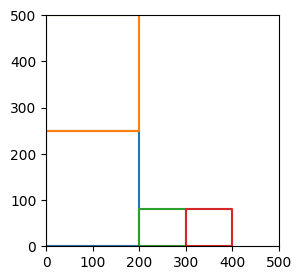

In [10]:
# call the plot function

rects, all_pals = solver(n_812, n_2025, bins)
soln_plot(rects, box_812, box_2025)